Root (converged): 0.7390848229131414


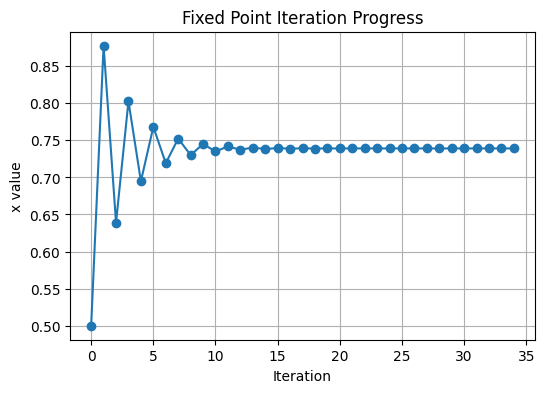

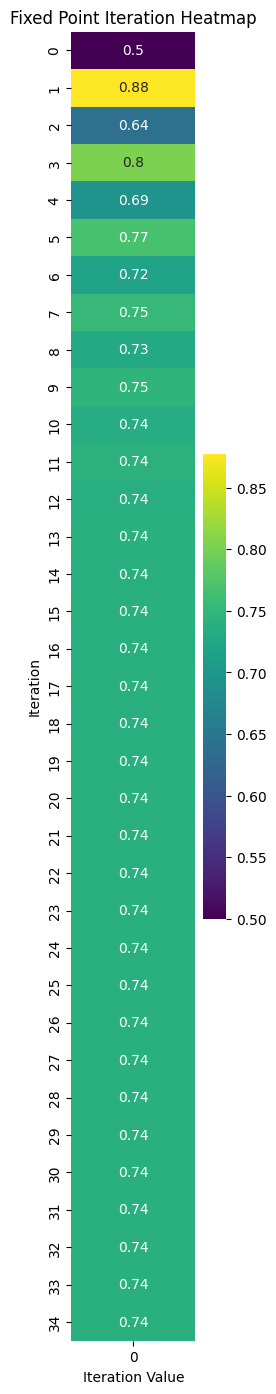

In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -------------------------
# Define g(x) as a lambda function
# -------------------------
g = lambda x: math.cos(x)  # Example: x = cos(x)

# -------------------------
# Fixed-point iteration parameters
# -------------------------
xn = 0.5         # Initial guess
tol = 1e-6       # Tolerance
iterations = [xn]  # Store all iteration values

# -------------------------
# Fixed-point iteration loop with divergence check
# -------------------------
x_next = g(xn)
prev_gap = abs(x_next - xn)

while abs(x_next - xn) > tol:
    current_gap = abs(x_next - xn)
    
    # Check if gap is increasing → divergent
    if current_gap > prev_gap:
        print("The iteration is divergent!")
        break
    
    iterations.append(x_next)
    xn = x_next
    x_next = g(xn)
    prev_gap = current_gap

else:
    # Only executed if while loop didn't break (converged)
    iterations.append(x_next)
    print("Root (converged):", x_next)

# -------------------------
# Plot 1: Iteration progress (line plot)
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(range(len(iterations)), iterations, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Fixed Point Iteration Progress')
plt.grid(True)
plt.show()

# -------------------------
# Plot 2: Heatmap of iteration values
# -------------------------
data = np.array(iterations).reshape(-1, 1)  # convert to column vector

plt.figure(figsize=(2, len(iterations)//2))
sns.heatmap(
    data, annot=True, cmap='viridis', cbar=True,
    yticklabels=range(len(iterations))
)
plt.xlabel('Iteration Value')
plt.ylabel('Iteration')
plt.title('Fixed Point Iteration Heatmap')
plt.show()


gauss elimination

Solution: [ 2.  3. -1.]


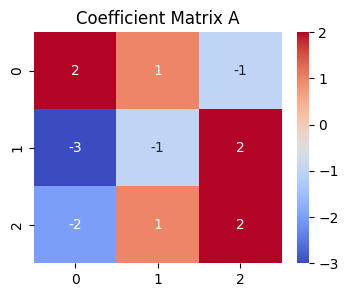

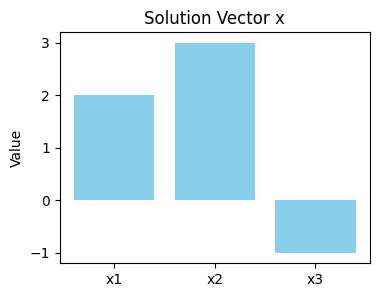

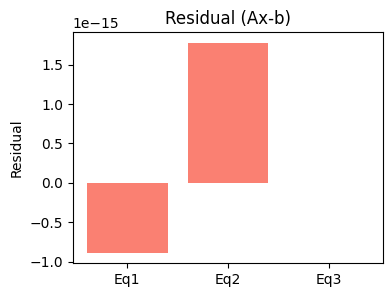

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)
b = np.array([8, -11, -3], dtype=float)

# Solve using built-in 
x = np.linalg.solve(A, b)
print("Solution:", x)

# Visualize the coefficient matrix
plt.figure(figsize=(4,3))
sns.heatmap(A, annot=True, cmap='coolwarm', cbar=True)
plt.title('Coefficient Matrix A')
plt.show()

# Visualize the solution vector as a bar chart
plt.figure(figsize=(4,3))
plt.bar(range(len(x)), x, color='skyblue')
plt.xticks(range(len(x)), ['x1','x2','x3'])
plt.ylabel('Value')
plt.title('Solution Vector x')
plt.show()

# Optional: visualize error (Ax-b) to see solver accuracy
error = A @ x - b
plt.figure(figsize=(4,3))
plt.bar(range(len(error)), error, color='salmon')
plt.xticks(range(len(error)), ['Eq1','Eq2','Eq3'])
plt.ylabel('Residual')
plt.title('Residual (Ax-b)')
plt.show()


# Gauss jordan elimination

In [1]:
import numpy as np

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)
b = np.array([8, -11, -3], dtype=float)

x = np.linalg.solve(A, b)
print("Solution:", x)
###import numpy as np

A = np.array([[1,3,2],
              [2,7,7],
              [2,5,12]], dtype=float)
b = np.array([2,-1,7], dtype=float)

solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print("Q2 Approx/General Solution (x,y,z):", solution)
###

Solution: [ 2.  3. -1.]
Q2 Approx/General Solution (x,y,z): [15.72727273 -4.45454545 -0.18181818]


# Bisection

In [ ]:
from scipy.optimize import bisect
import math


f = lambda x:  (667.38 / x) * (1 - math.exp(-0.146843 * x)) - 40


a = 12
b = 16


if f(a) * f(b) >= 0:
    raise ValueError("f(a) and f(b) must have opposite signs for bisect.")


root = bisect(f, a=a, b=b, xtol=0.422, maxiter=100)
print("Root:", root)


Root: 14.75


# False position

In [35]:
import numpy as np

def false_position(f, a, b, tol=1e-6, max_iter=100):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    for n in range(1, max_iter+1):
        c = (a*fb - b*fa)/(fb - fa)
        fc = f(c)
        print(f"Iteration {n}: c = {c:.6f}")
        
        if abs(fc) < tol:
            return c
        
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return c

# -------------------------
# Example usage
# -------------------------
f = lambda x: np.cos(x) - x
root = false_position(f, 0, 1)
print("Root:", root)


Iteration 1: c = 0.685073
Iteration 2: c = 0.736299
Iteration 3: c = 0.738945
Iteration 4: c = 0.739078
Iteration 5: c = 0.739085
Root: 0.7390847824489231


# Lesast square regression

Slope (m): 0.8
Intercept (c): 1.4999999999999991


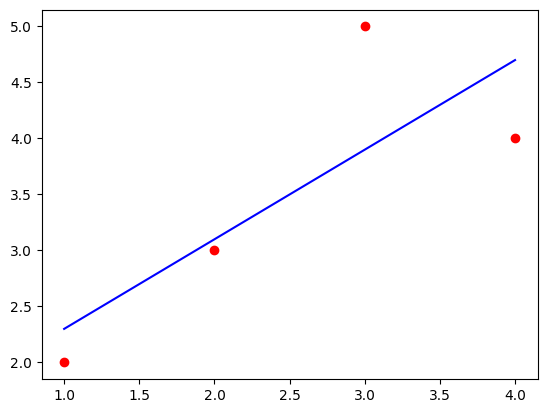

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 5, 4])

# Fit a line: degree=1
m, c = np.polyfit(x, y, 1)

print("Slope (m):", m)
print("Intercept (c):", c)

# Plot
plt.scatter(x, y, color='red')
plt.plot(x, m*x + c, color='blue')
plt.show()


# Logistic regression

Linear equation (before sigmoid): Y = 0.9576 X + -4.7477
Predicted probability for X=8.5: 0.9675
Predicted class for X=8.5: 1


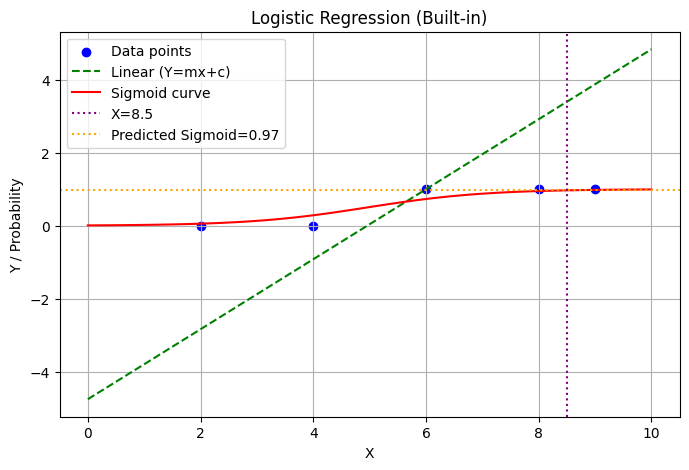

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# -------------------------
# Dataset
# -------------------------
X = np.array([[2],[4],[6],[8],[9]])   # feature values
y = np.array([0,0,1,1,1])             # class labels

# -------------------------
# Fit logistic regression
# -------------------------
model = LogisticRegression()
model.fit(X, y)

# Extract linear parameters
m = model.coef_[0][0]      # slope
c = model.intercept_[0]    # intercept
print(f"Linear equation (before sigmoid): Y = {m:.4f} X + {c:.4f}")

# -------------------------
# Predict probability for X = 8.5
# -------------------------
X_pred = np.array([[8.5]])
p = model.predict_proba(X_pred)[0][1]  # probability of class 1
pred_class = model.predict(X_pred)[0]  # predicted class
print(f"Predicted probability for X=8.5: {p:.4f}")
print(f"Predicted class for X=8.5: {pred_class}")

# -------------------------
# Optional: Plot
# -------------------------
# Original linear values
X_range = np.linspace(0, 10, 100).reshape(-1,1)
Y_linear = model.coef_[0][0]*X_range + model.intercept_[0]
Y_sigmoid = model.predict_proba(X_range)[:,1]

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, Y_linear, color='green', linestyle='--', label='Linear (Y=mx+c)')
plt.plot(X_range, Y_sigmoid, color='red', label='Sigmoid curve')
plt.axvline(8.5, color='purple', linestyle=':', label='X=8.5')
plt.axhline(p, color='orange', linestyle=':', label=f'Predicted Sigmoid={p:.2f}')

plt.xlabel('X')
plt.ylabel('Y / Probability')
plt.title('Logistic Regression (Built-in)')
plt.legend()
plt.grid(True)
plt.show()


# Gradient descent 

In [38]:
from sklearn.linear_model import SGDRegressor
import numpy as np

# Dataset
X = np.array([1, 2, 3, 4]).reshape(-1, 1)  # scikit-learn expects 2D input
y = np.array([2, 3, 4, 5])

# Define model (Stochastic Gradient Descent Regressor)
model = SGDRegressor(
    max_iter=50,   # number of iterations
    learning_rate='constant',
    eta0=0.1,      # learning rate
    penalty=None,  # no regularization
    random_state=42
)

# Fit model
model.fit(X, y)

# Parameters
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (c): {model.intercept_[0]:.4f}")

# Predict new value
X_new = np.array([[5]])
Y_new = model.predict(X_new)
print(f"Predicted Y for X=5: {Y_new[0]:.4f}")


Slope (m): 1.0695
Intercept (c): 0.8320
Predicted Y for X=5: 6.1796
